# Predicting Startup Success: A Data Analysis Report

## Introduction

In the rapidly evolving world of business and entrepreneurship, startups play a pivotal role in driving innovation, economic growth, and job creation. However, the journey of a startup is fraught with challenges, uncertainties, and high failure rates. Therefore, predicting the success of a startup is not just a matter of academic interest but has significant implications for investors, policymakers, and entrepreneurs alike. The ability to identify startups with the potential for rapid growth can provide investors with a competitive edge, enable policymakers to foster a conducive environment for entrepreneurship, and assist founders in making informed strategic decisions.

In this analysis, I aim to leverage a comprehensive dataset containing various features related to startup performance, industry trends, and investment insights to predict whether a startup is likely to succeed or fail. I will delve into the dataset to uncover patterns, relationships, and key indicators that contribute to startup success. By doing so, I hope to provide actionable insights that can guide stakeholders in their decision-making processes.


### Import Libraries and Data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv('startup_data.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


## Exploratory Data Analysis (EDA) and Visualization

### Check for missing values and summary statistics

In [3]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

There are several columns with missing values that need to be addressed to ensure the accuracy and reliability of the analysis.

Unnamed: 6: 493 missing values
closed_at: 588 missing values
age_first_milestone_year: 152 missing values
age_last_milestone_year: 152 missing values
state_code.1: 1 missing value

Missing values will be handled in the Data Cleaning and Preprocessing section below. 

In [4]:
# Summary statistics
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


### Visualization of the distribution of the target variable (status)

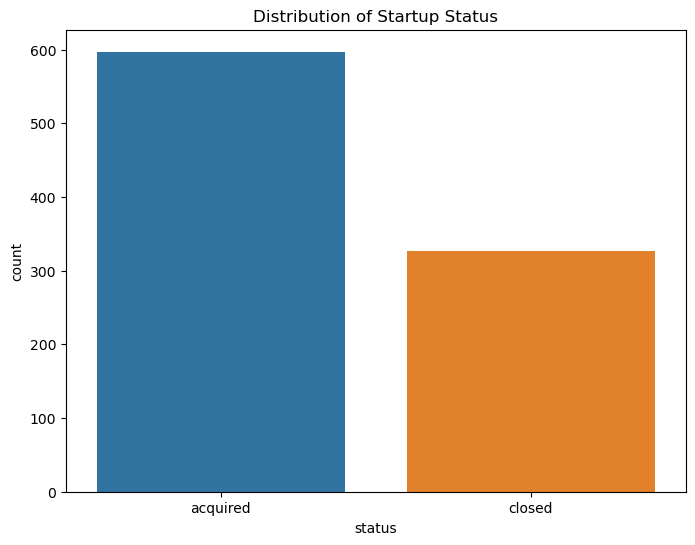

In [5]:
# Visualize the distribution of the target variable (status)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status')
plt.title('Distribution of Startup Status')
plt.show()

The visualization of the "status" target variable indicates a significant data imbalance. Accuracy may be misleading, so I included other evaluation methods such as precision and recall in the Model Evaluation section. 

### Visualization of the categorical variables 

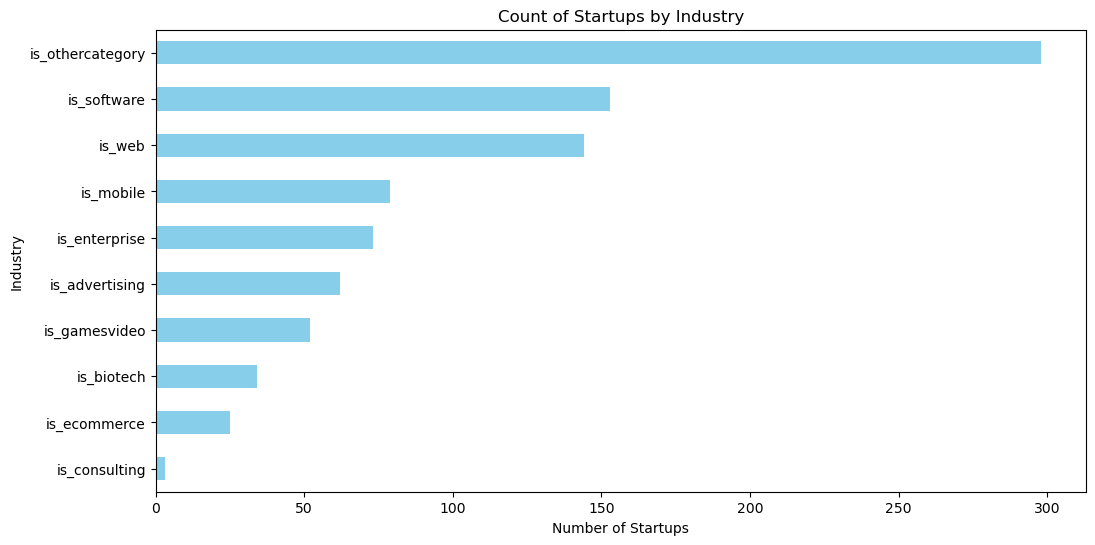

In [6]:
# Summing up the binary columns to get the count of startups in each industry
industry_counts = df[['is_software', 'is_web', 'is_mobile', 'is_enterprise', 
                      'is_advertising', 'is_gamesvideo', 'is_ecommerce', 
                      'is_biotech', 'is_consulting', 'is_othercategory']].sum()

# Plotting the distribution of startups by industry
plt.figure(figsize=(12, 6))
industry_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Count of Startups by Industry')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')
plt.show()

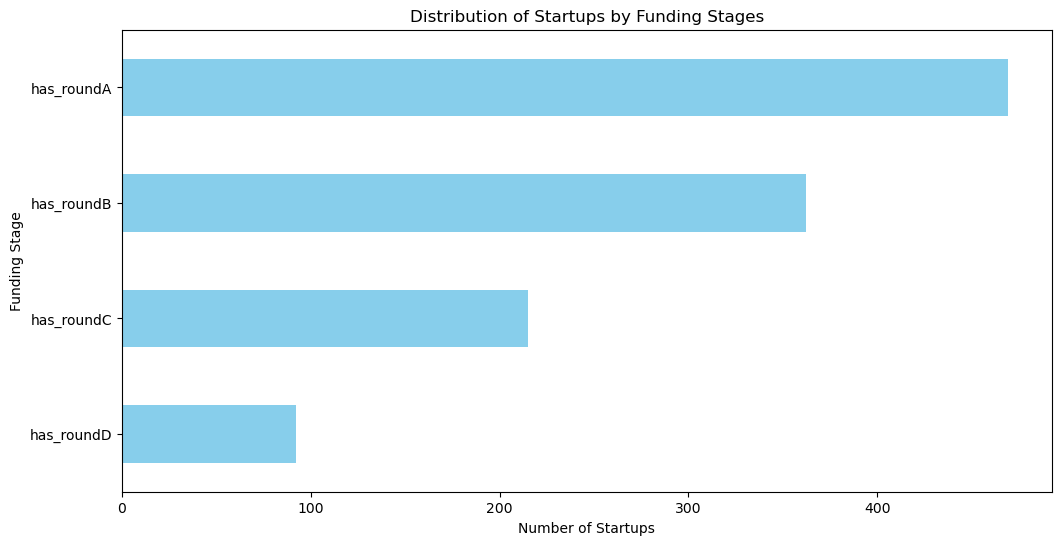

In [7]:
# Summing up the binary columns to get the count of startups in each funding stage
industry_counts = df[['has_roundA', 'has_roundB','has_roundC','has_roundD']].sum()

# Plotting the distribution of startups by funding stage
plt.figure(figsize=(12, 6))
industry_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Startups by Funding Stages')
plt.xlabel('Number of Startups')
plt.ylabel('Funding Stage')
plt.show()

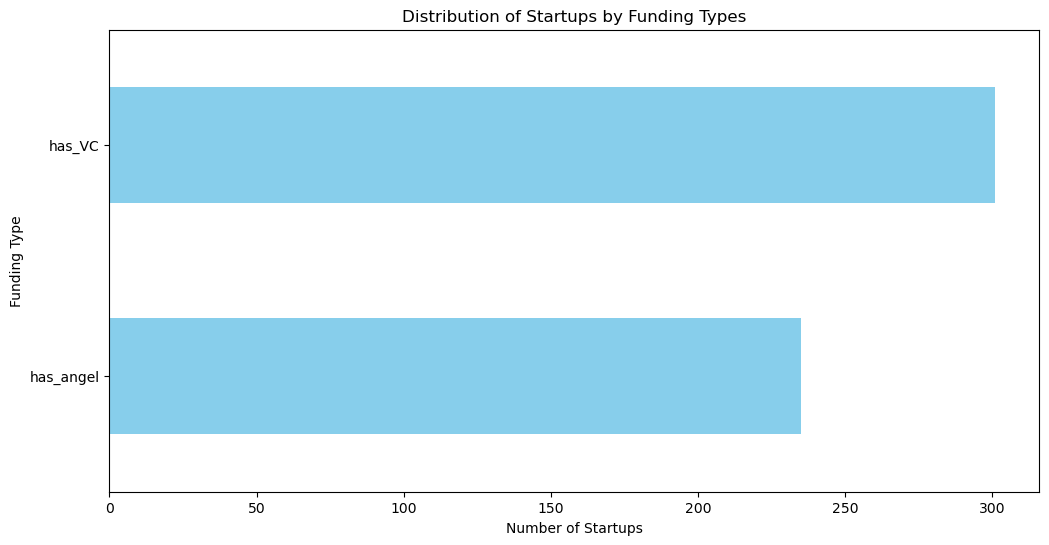

In [8]:
# Summing up the binary columns to get the count of startups in each funding type
industry_counts = df[['has_angel', 'has_VC']].sum()

# Plotting the distribution of startups by funding type
plt.figure(figsize=(12, 6))
industry_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Startups by Funding Types')
plt.xlabel('Number of Startups')
plt.ylabel('Funding Type')
plt.show()

### Visualization of continuous variables

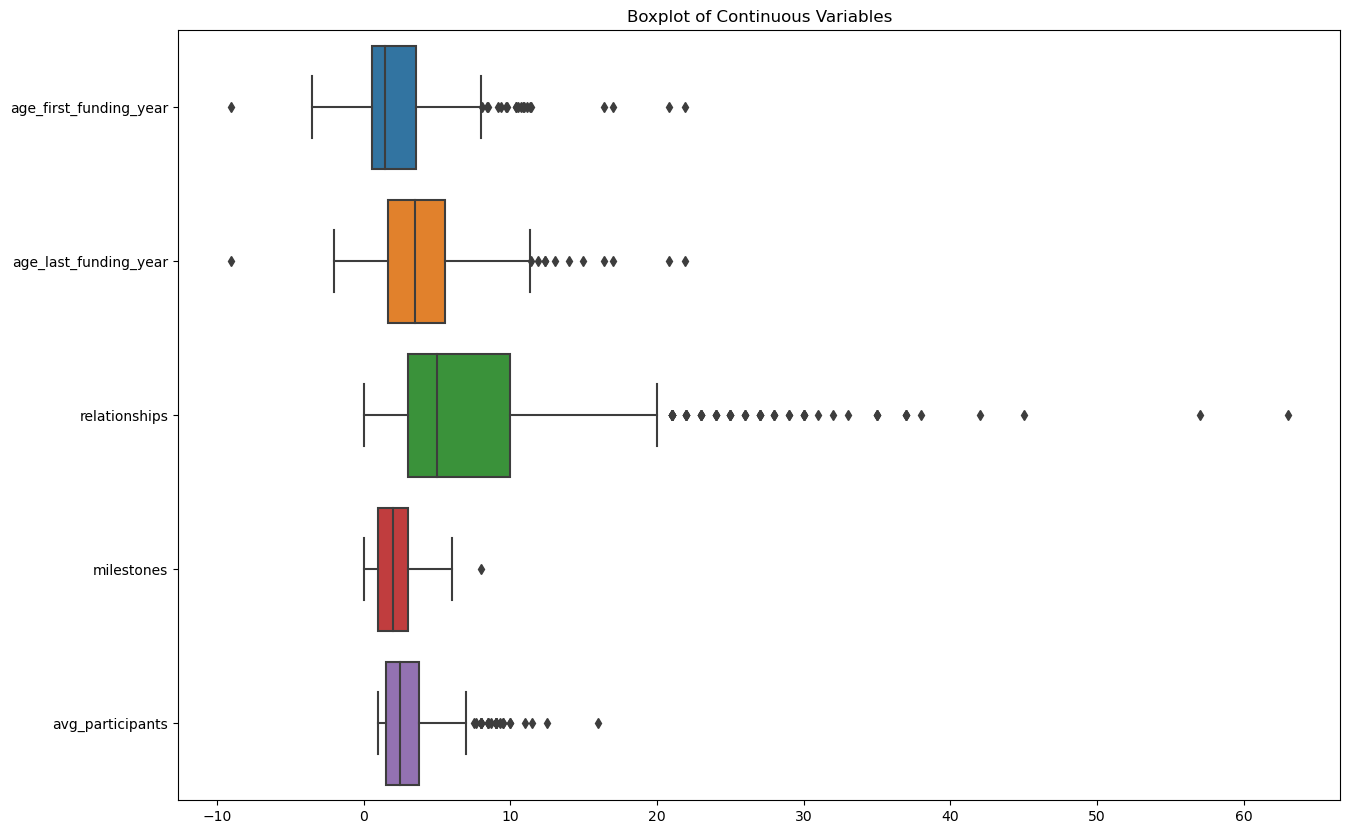

In [9]:
# Boxplot for continuous variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['age_first_funding_year', 'age_last_funding_year', 'relationships', 'milestones', 'avg_participants']], orient="h")
plt.title('Boxplot of Continuous Variables')
plt.show()

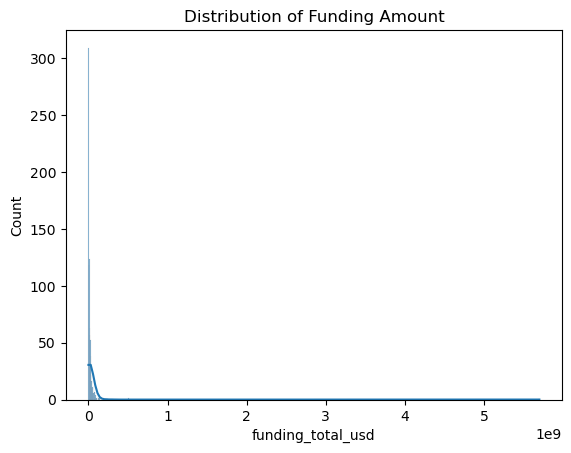

In [10]:
# Visualize the distribution of funding amount
sns.histplot(df['funding_total_usd'], kde=True)
plt.title('Distribution of Funding Amount')
plt.show()

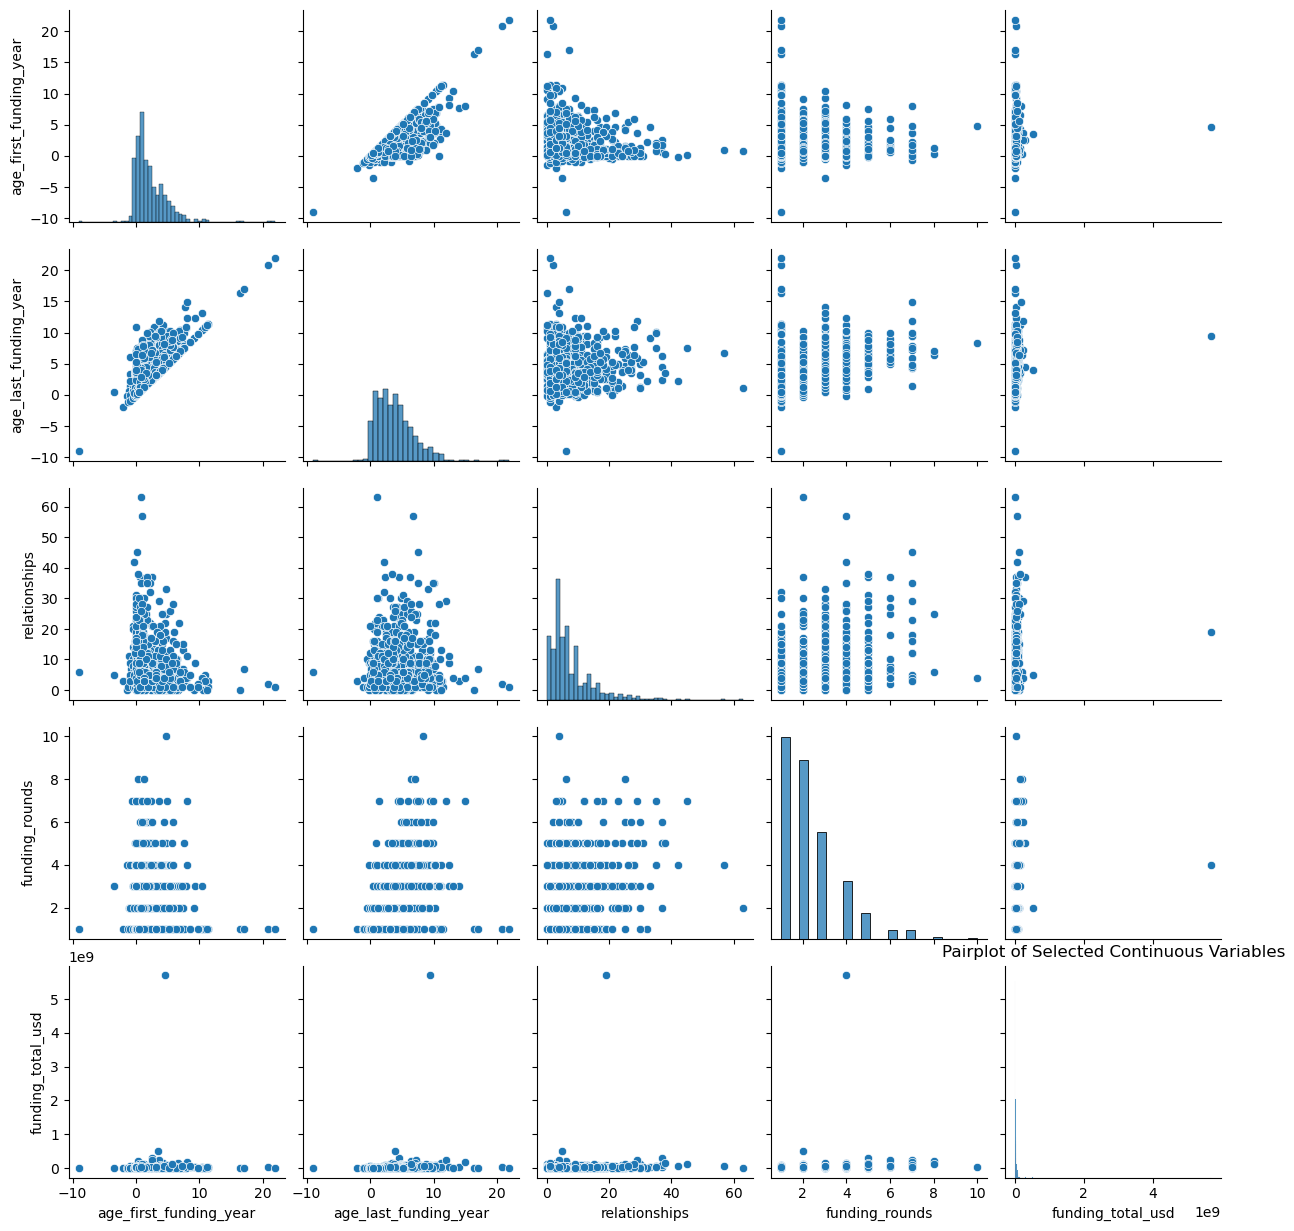

In [11]:
# Pairplot for continuous variables
sns.pairplot(df[['age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'funding_total_usd']])
plt.title('Pairplot of Selected Continuous Variables')
plt.show()

## Data Cleaning and Preprocessing

Before diving into the analysis, it is crucial to ensure that the data is clean, consistent, and ready for analysis. In my dataset, I encountered missing values, outliers, and inconsistencies that needed to be addressed. I performed the following data cleaning steps:

- Handling Missing Values: I addressed missing values by dropping unnecssary columns.
- Outlier Detection and Removal: I identified and removed outliers that could potentially skew my analysis and predictions.
- Encoding Categorical Variables: Categorical variables were encoded using label encoding to convert them into a format that could be fed into machine learning models.

### Drop Unnecessary Data, Remove Outliers, Encode Categorical Variables

In [12]:
# Drop unnecessary columns
df.drop(['Unnamed: 6', 'Unnamed: 0', 'id', 'name', 'object_id', 'first_funding_at',
         'zip_code', 'city', 'founded_at', 'closed_at', 'age_last_milestone_year',
         'age_first_milestone_year', 'state_code.1',  'last_funding_at'], axis=1, inplace=True)

In [13]:
# Remove outliers
std_deviation = 2
mean = df['avg_participants'].mean()
std = df['avg_participants'].std()

upper_threshold = mean + (std_deviation * std)
lower_threshold = mean - (std_deviation * std)
df = df[(df['avg_participants'] >= lower_threshold) & (df['avg_participants'] <= upper_threshold)]



In [14]:
# Label Encoding for categorical variables
list_str = df.select_dtypes(include='object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

In [15]:
df.head()

,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,2,42.358880,-71.056820,1,2.2493,3.0027,3,3,375000,3,...,1,0,1,0,0,0,0,1.0000,0,0
1,2,37.238916,-121.973718,1,5.1260,9.9973,9,4,40100000,1,...,0,1,0,0,1,1,1,4.7500,1,0
2,2,32.901049,-117.192656,1,1.0329,1.0329,5,1,2600000,2,...,0,0,0,1,0,0,0,4.0000,1,0
3,2,37.320309,-122.050040,1,3.1315,5.3151,5,3,40000000,1,...,0,0,0,0,1,1,1,3.3333,1,0
4,2,37.779281,-122.419236,0,0.0000,1.6685,2,2,1300000,1,...,0,1,1,0,0,0,0,1.0000,1,1


### Correlation Heatmap

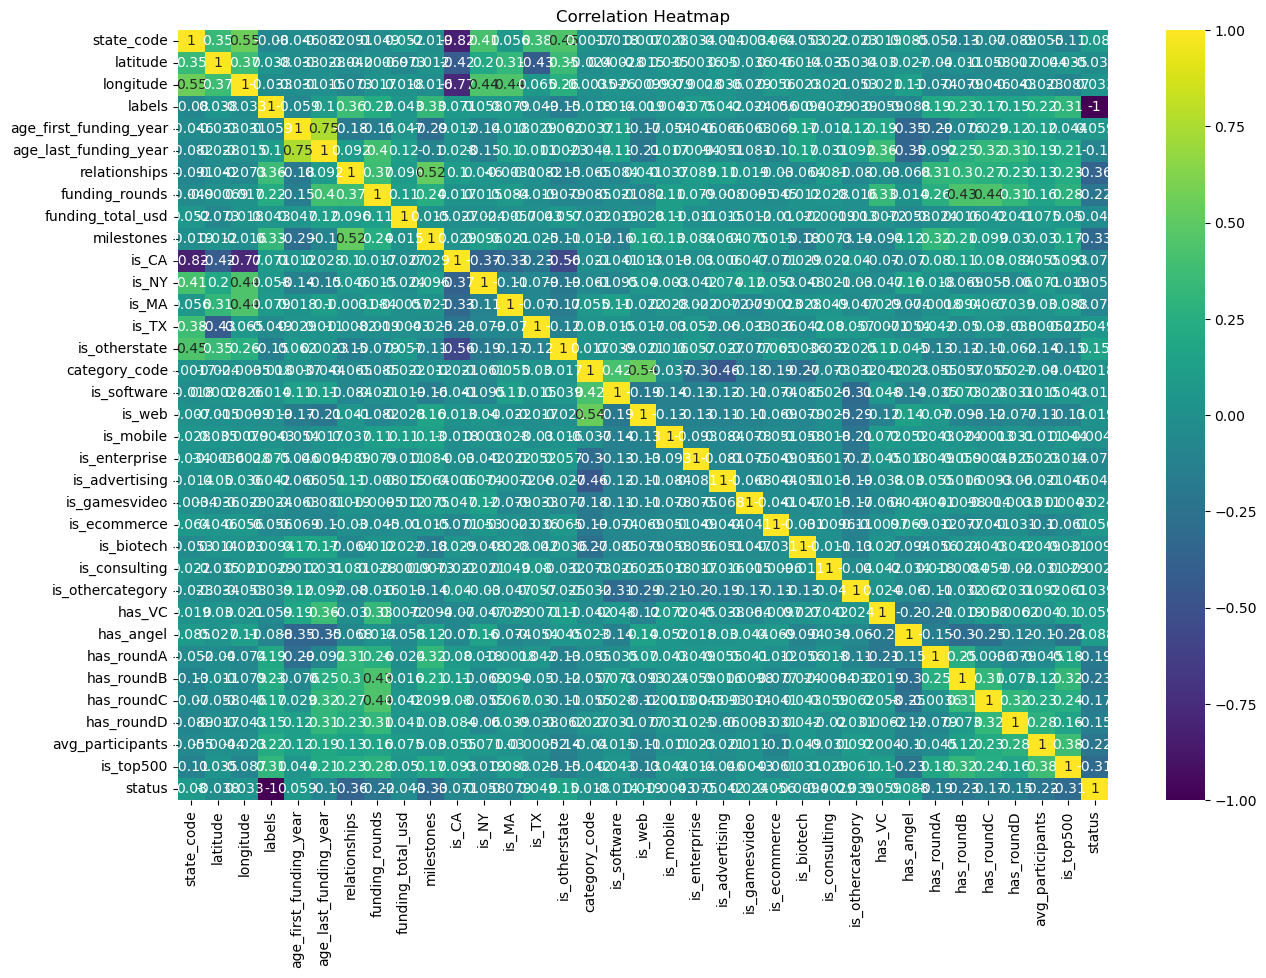

In [16]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


Through the heatmap, I found that the labels column and status perfectly correlated. 
We are going drop lables and use status as our target variable.

In [17]:
# Drop 'labels' column
df.drop(['labels'], axis=1, inplace=True)

## Model Selection and Training

In [18]:
# Split the data into training and testing sets
X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Logistic Regression with Pipeline using Cross Validation
pipeline_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
lr_scores = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='accuracy')
lr_score = np.mean(lr_scores)

# Random Forest Classifier with GridSearchCV
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_score = rf_grid_search.best_score_

# SVM Classifier with Pipeline
pipeline_svm = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_scores = cross_val_score(pipeline_svm, X_train, y_train, cv=5, scoring='accuracy')
svm_score = np.mean(svm_scores)

## Model Evaluation

In [20]:
# Model Evaluation
print(f'Logistic Regression Accuracy: {lr_score}')
print(f'Random Forest Accuracy: {rf_score}')
print(f'SVM Accuracy: {svm_score}')

# Predictions and Classification Reports
lr_y_pred = pipeline_lr.fit(X_train, y_train).predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_y_pred))

rf_y_pred = rf_grid_search.fit(X_train, y_train).predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

svm_y_pred = pipeline_svm.fit(X_train, y_train).predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))

Logistic Regression Accuracy: 0.7453191489361701
Random Forest Accuracy: 0.7979635258358663
SVM Accuracy: 0.7368490374873353
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.59      0.47      0.52        58

    accuracy                           0.72       176
   macro avg       0.67      0.65      0.66       176
weighted avg       0.70      0.72      0.71       176

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       118
           1       0.71      0.47      0.56        58

    accuracy                           0.76       176
   macro avg       0.74      0.69      0.70       176
weighted avg       0.75      0.76      0.75       176

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       118
  

## Key Findings from Model Evaluation

1. Random Forest Outperforms Other Models:

Random Forest demonstrates the highest accuracy of 79.80% and achieves the best balance between precision and recall for both classes compared to Logistic Regression and SVM.

2. Logistic Regression and SVM Show Similar Performance:

Both Logistic Regression and SVM models have comparable accuracies around 73%, but Logistic Regression slightly outperforms SVM in terms of precision and recall for class 0 (successful startups).

3. Class Imbalance Issues:

The dataset appears to have class imbalance issues, with significantly more successful startups (Class 0) than failed startups (Class 1). This imbalance may be affecting the recall and F1-score for the minority class (Class 1).


### Actionable Insights for Stakeholders
- Choose Random Forest for Better Predictive Performance:

Based on the evaluation results, stakeholders should consider using the Random Forest model for predicting startup success due to its superior performance compared to Logistic Regression and SVM.

- Address Class Imbalance:

To improve the predictive performance for both classes, it is recommended to address the class imbalance issue through techniques such as oversampling, undersampling, or using synthetic data generation methods.

- Optimize Model Parameters:

Fine-tuning the hyperparameters of the Random Forest model could further enhance its performance.

## Feature Importance

In [21]:
# Extract feature importance from the Random Forest model
importance = rf_grid_search.best_estimator_.feature_importances_

# Create a DataFrame to display the features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)

                   Feature  Importance
5            relationships    0.196054
7        funding_total_usd    0.105823
4    age_last_funding_year    0.093267
8               milestones    0.083093
3   age_first_funding_year    0.075560
2                longitude    0.059766
1                 latitude    0.054066
31        avg_participants    0.051350
6           funding_rounds    0.041570
14           category_code    0.039251
32               is_top500    0.032455
0               state_code    0.025448
28              has_roundB    0.014503
27              has_roundA    0.013036
25                  has_VC    0.012038
13           is_otherstate    0.010468
24        is_othercategory    0.010249
26               has_angel    0.009222
9                    is_CA    0.008455
15             is_software    0.008228
29              has_roundC    0.007847
30              has_roundD    0.006982
16                  is_web    0.005491
17               is_mobile    0.005401
18           is_enterpris

## Key Findings from Feature Importance Analysis

The Random Forest model was employed to determine the importance of various features in predicting the success or failure of startups. The feature importance scores, presented below, provide valuable insights into which features have the most significant impact on the outcome:

### Top 5 Most Important Features

- Relationships (19.61%):

The number of relationships a startup has is the most influential feature, indicating that the networking and connections a startup builds can significantly impact its success.

- Funding Total (10.58%):

The total amount of funding received by a startup is the second most important feature, suggesting that financial backing plays a crucial role in determining a startup's trajectory.

- Age of Last Funding Year (9.33%):

The age of the startup at the time of its last funding round is another significant predictor, implying that more established startups are more likely to succeed.

- Milestones (8.31%):

The number of milestones achieved by a startup is also a key determinant, indicating that reaching key business milestones can be indicative of a startup's potential success.

- Age of First Funding Year (7.56%):

The age of the startup at the time of its first funding round rounds out the top 5 features, suggesting that early financial backing can be a predictor of future success.

### Other Noteworthy Features

- Geographical Location (Latitude & Longitude):

The latitude and longitude of the startup's location are also important, albeit to a lesser extent, suggesting that the geographical location can influence a startup's success, possibly due to access to resources, talent, or market proximity.

- Average Participants (5.14%):

The average number of participants in funding rounds is also a relevant factor, highlighting the importance of collaboration and team dynamics in a startup's success.

- Category Code (3.93%):

The category or industry type of the startup is a contributing factor, indicating that certain industries may have a higher likelihood of success than others.

## Conclusion

The analysis of startup success is a complex and multifaceted problem that requires a comprehensive understanding of various factors, including funding, industry trends, and investor relationships. While my analysis provides valuable insights and predictive models, it is essential to approach startup evaluation with a holistic and nuanced perspective. By incorporating the insights and recommendations from this analysis into their decision-making processes, stakeholders can enhance their chances of identifying and supporting successful startups, thereby contributing to economic growth and innovation.